# **AOL Machine Learning Kelompok 11**
- Putri Maysa Adira (2702372826)
- Jovita Putri Aulia (2702352616)
- Keyla Faristha Rindani (2702363254)


## **EDA (Exploratory Data Analysis)**

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

In [ ]:
df=pd.read_csv('/content/dataset AOL ML copy.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### **Showing missing values for each variables**

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
data_types = df.dtypes

missing_data = pd.DataFrame({'Missing Values': missing_values,
                             'Missing Percentage': missing_percentage,
                             'Data Type': data_types})

missing_data = missing_data.sort_values(by=['Missing Percentage'], ascending=False)

print(missing_data)


                 Missing Values  Missing Percentage Data Type
RowNumber                     0                 0.0     int64
CustomerId                    0                 0.0     int64
Surname                       0                 0.0    object
CreditScore                   0                 0.0     int64
Geography                     0                 0.0    object
Gender                        0                 0.0    object
Age                           0                 0.0     int64
Tenure                        0                 0.0     int64
Balance                       0                 0.0   float64
NumOfProducts                 0                 0.0     int64
HasCrCard                     0                 0.0     int64
IsActiveMember                0                 0.0     int64
EstimatedSalary               0                 0.0   float64
Exited                        0                 0.0     int64



The data shows no missing values.

### **Showing duplicate data for each variables**

In [ ]:
duplicate_values = df.duplicated().sum()
duplicate_percentage = (duplicate_values / len(df)) * 100
data_types = df.dtypes

duplicate_data = pd.DataFrame({'Duplicate Count': [duplicate_values],
                               'Duplicate Percentage': [duplicate_percentage],
                               'Data Type': [df.dtypes[0]]})

duplicate_data = duplicate_data.transpose()

print("Duplicate Data Summary:")
print(duplicate_data)


Duplicate Data Summary:
                          0
Duplicate Count           0
Duplicate Percentage    0.0
Data Type             int64



The data shows no duplicated data.

In [ ]:
# Numerical columns
num_cols = df.select_dtypes(include='number')

print(num_cols.head())

   RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [ ]:
# Categorical columns
cat_cols = df.select_dtypes(include='object')

print(cat_cols.head())

    Surname Geography  Gender
0  Hargrave    France  Female
1      Hill     Spain  Female
2      Onio    France  Female
3      Boni    France  Female
4  Mitchell     Spain  Female


### **DESCRIPTIONS VARIABLE :**

#### **Numerical Variables (num_cols)**
1. RowNumber: Index number for each row
2. CustomerId: Unique identification number for customers
3. CreditScore: Numerical score representing the creditworthiness of the customer
4. Age: Age of the customer
5. Tenure: Duration of the customer's relationship with the bank (in years)
6. Balance: Account balance of the customer
7. NumOfProducts: Number of products the customer uses at the bank
8. HasCrCard: Binary variable indicating if the customer has a credit card (0 = No, 1 = Yes)
9. IsActiveMember: Binary variable showing if the customer is an active bank member (0 = No, 1 = Yes)
10. EstimatedSalary: Estimated annual salary of the customer
11. Exited: Target variable (0 = Customer did not leave, 1 = Customer left)

#### **Categorical Variables (cat_cols)**
1. Surname: Last name of the customer
2. Geography: Location of the customer (e.g., France, Spain, Germany)
3. Gender: Gender of the customer (Male or Female)

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [ ]:
df['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


In [ ]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [ ]:
df['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


### **Visualization of data distribution**

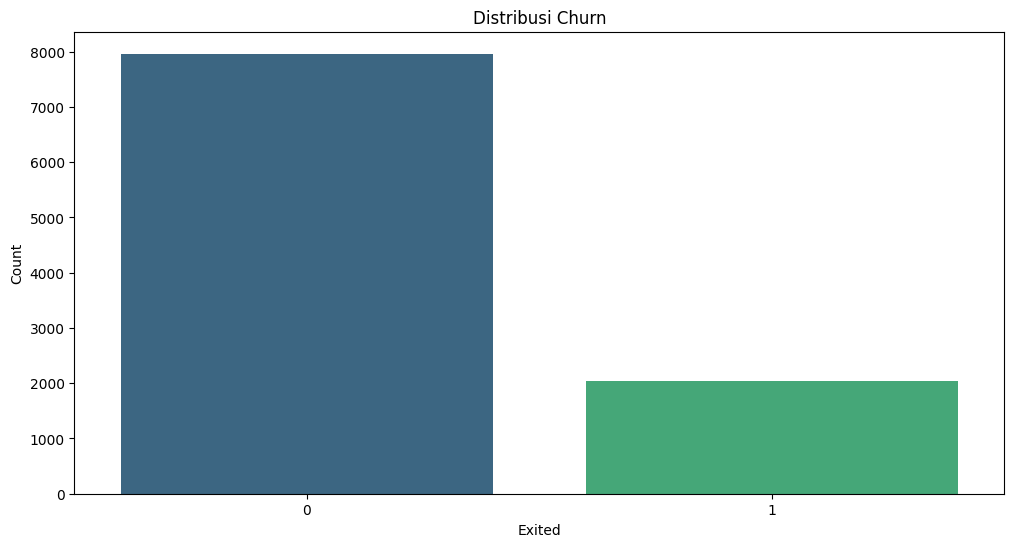

In [ ]:
#Data Exited
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Exited'], palette='viridis')
plt.title('Distribusi Churn')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

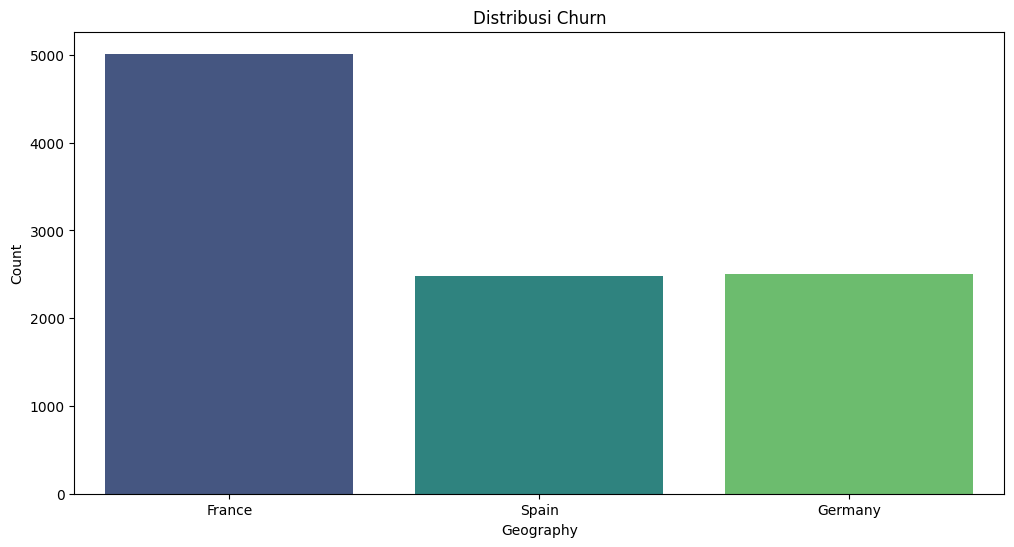

In [ ]:
# Data Geography
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Geography'], palette='viridis')
plt.title('Distribusi Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

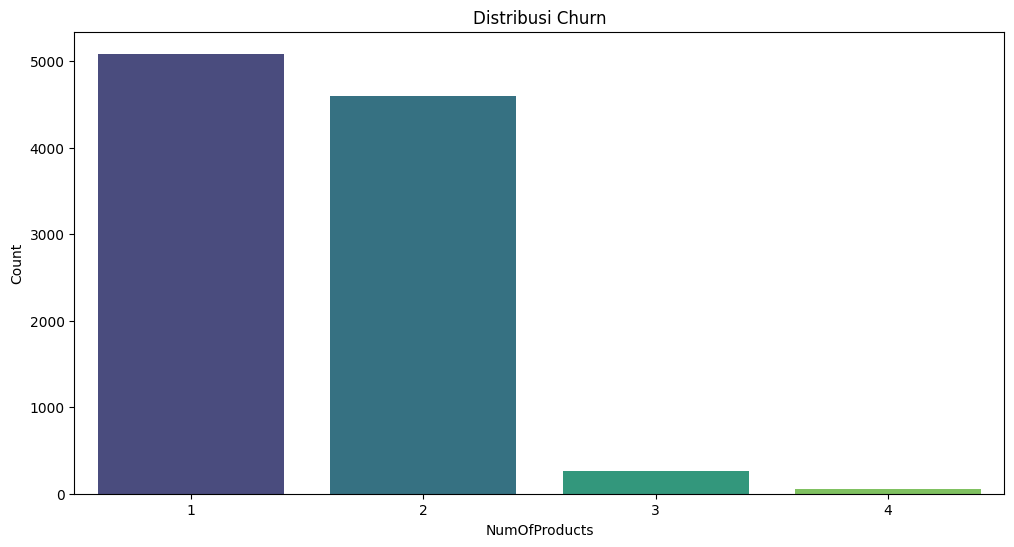

In [ ]:
# Data NumofProduct
plt.figure(figsize=(12, 6))
sns.countplot(x=df['NumOfProducts'], palette='viridis')
plt.title('Distribusi Churn')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()

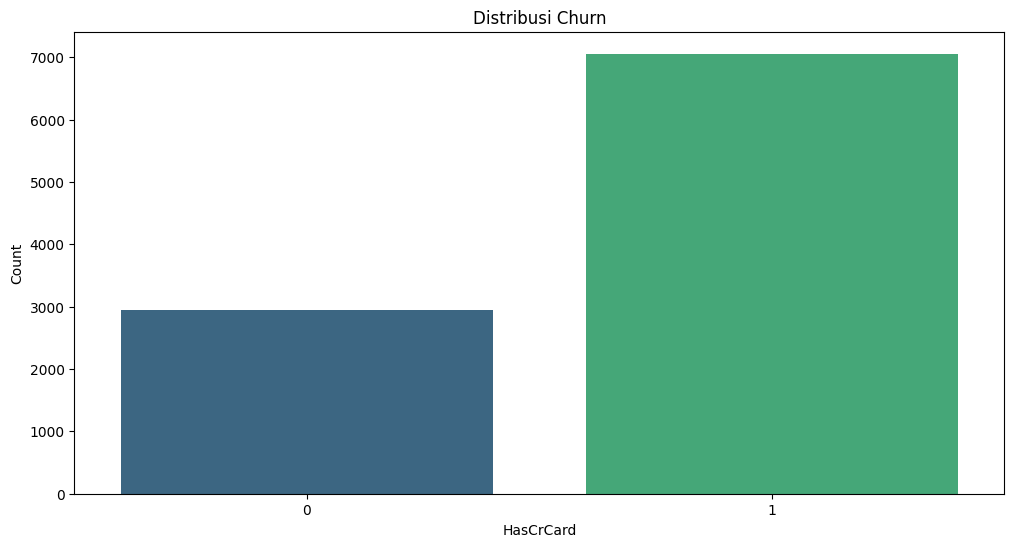

In [ ]:
# Data HasCrCard
plt.figure(figsize=(12, 6))
sns.countplot(x=df['HasCrCard'], palette='viridis')
plt.title('Distribusi Churn')
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.show()

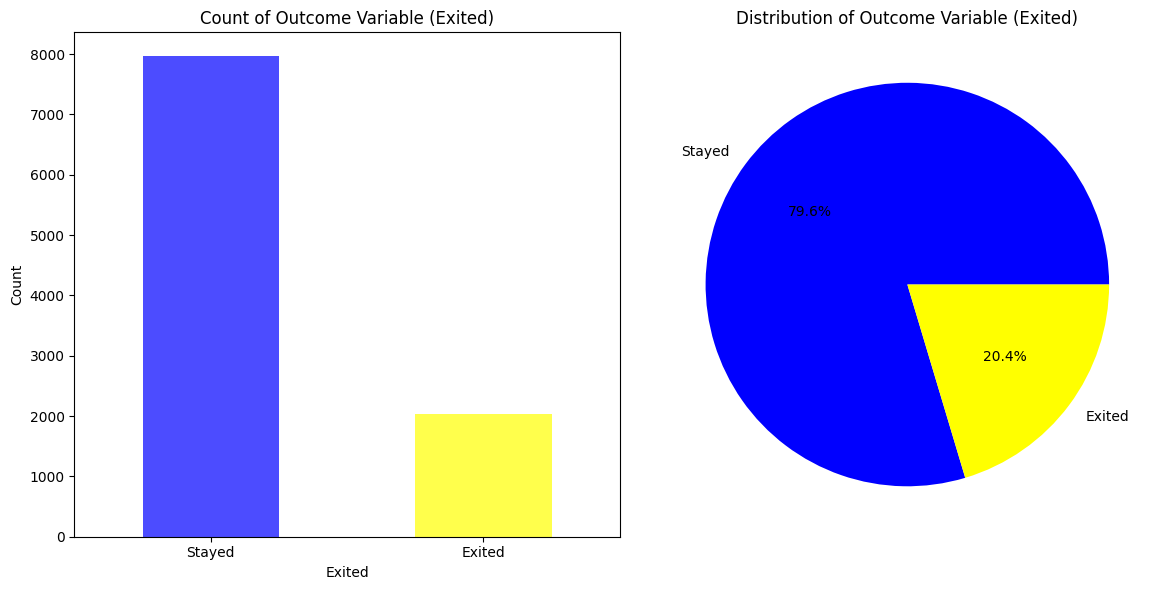

Exited Summary Table
        Count  Percentage
Exited                   
0        7963       79.63
1        2037       20.37


In [ ]:
# Data Exited
exited_counts = df['Exited'].value_counts()
exited_percentages = df['Exited'].value_counts(normalize=True) * 100

# Create a summary table for the 'Exited' variable
summary_table = pd.DataFrame({
    'Count': exited_counts,
    'Percentage': exited_percentages
})

# Create visualizations for the 'Exited' variable
plt.figure(figsize=(12, 6))

# Bar chart for counts
plt.subplot(1, 2, 1)
exited_counts.plot(kind='bar', color=['blue', 'yellow'], alpha=0.7)
plt.title('Count of Outcome Variable (Exited)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Exited'], rotation=0)

# Pie chart for percentages
plt.subplot(1, 2, 2)
exited_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'yellow'], labels=['Stayed', 'Exited'])
plt.title('Distribution of Outcome Variable (Exited)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Display the summary table
print("Exited Summary Table")
print(summary_table)



Data Imbalance:

The dataset shows an imbalance between the Stayed and Exited classes. The majority class (Stayed) is much more dominant than the minority class (Exited).

# **Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split
# Check if the columns exist before dropping them
columns_to_drop = ['Surname', 'CustomerId', 'RowNumber']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=existing_columns_to_drop)

X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# **Feature Engineering**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform the 'Geography' column in training and testing data. Transform 'Geography' in X_train and X_test
geo_train = encoder.fit_transform(X_train[['Geography']])
geo_test = encoder.transform(X_test[['Geography']])

# Convert the transformed data into DataFrames with correct column names
geo_columns = encoder.get_feature_names_out(['Geography'])
geo_train_df = pd.DataFrame(geo_train, columns=geo_columns, index=X_train.index)
geo_test_df = pd.DataFrame(geo_test, columns=geo_columns, index=X_test.index)

# Drop the original 'Geography' column and concatenate the new one-hot encoded columns
X_train = pd.concat([X_train.drop(columns=['Geography']), geo_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['Geography']), geo_test_df], axis=1)

# Ensure all one-hot encoded columns are integers
X_train[geo_columns] = X_train[geo_columns].astype(int)
X_test[geo_columns] = X_test[geo_columns].astype(int)

# Display results
print("One-Hot Encoded Training Data:")
print(X_train.head())

print("\nOne-Hot Encoded Testing Data:")
print(X_test.head())

One-Hot Encoded Training Data:
      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
5866          735  Female   53       8  123845.36              2          0   
1938          518    Male   38       3   90957.81              1          0   
4194          572  Female   54       9   97382.53              1          1   
6332          619  Female   35       4   90413.12              1          1   
1             608  Female   41       1   83807.86              1          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
5866               1        170454.93                 1                  0   
1938               1        162304.59                 1                  0   
4194               1        195771.95                 0                  1   
6332               1         20555.21                 1                  0   
1                  1        112542.58                 0                  0   

      Geography_Spain  
5

In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
5866,735,Female,53,8,123845.36,2,0,1,170454.93,1,0,0
1938,518,Male,38,3,90957.81,1,0,1,162304.59,1,0,0
4194,572,Female,54,9,97382.53,1,1,1,195771.95,0,1,0
6332,619,Female,35,4,90413.12,1,1,1,20555.21,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1


In [ ]:
# Perform binary encoding on the 'Gender' column
X_train['Gender'] = X_train['Gender'].map({'Female': 0, 'Male': 1})
X_test['Gender'] = X_test['Gender'].map({'Female': 0, 'Male': 1})

# Display the results
print("\nTraining Data with Binary Encoded Gender:")
print(X_train[['Gender']].head())

print("\nTesting Data with Binary Encoded Gender:")
print(X_test[['Gender']].head())



Training Data with Binary Encoded Gender:
      Gender
5866       0
1938       1
4194       0
6332       0
1          0

Testing Data with Binary Encoded Gender:
      Gender
2605       0
9717       1
68         0
9397       0
4004       0


In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
5866,735,0,53,8,123845.36,2,0,1,170454.93,1,0,0
1938,518,1,38,3,90957.81,1,0,1,162304.59,1,0,0
4194,572,0,54,9,97382.53,1,1,1,195771.95,0,1,0
6332,619,0,35,4,90413.12,1,1,1,20555.21,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1


# **Training Machine Learning Model**

### **K Means**

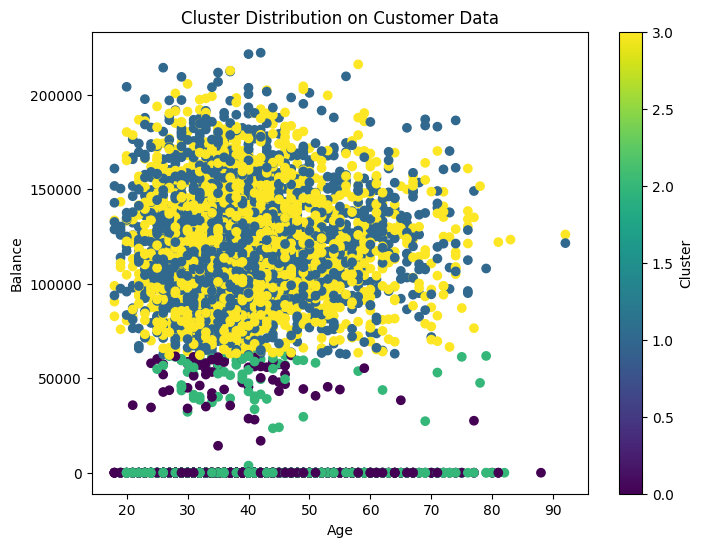

Cluster Centers:
[[6.50626804e+02 5.58075601e-01 3.85429553e+01 5.06185567e+00
  2.31627352e+03 1.78075601e+00 7.27835052e-01 5.20962199e-01
  4.97411521e+04 6.45360825e-01 1.37457045e-02 3.40893471e-01]
 [6.50152249e+02 5.39359862e-01 3.90116782e+01 5.01816609e+00
  1.21919530e+05 1.40397924e+00 6.93339100e-01 5.22058824e-01
  1.49411158e+05 3.94896194e-01 3.97491349e-01 2.07612457e-01]
 [6.47581792e+02 5.41251778e-01 3.86052632e+01 5.06685633e+00
  2.65014692e+03 1.76742532e+00 7.10526316e-01 5.14224751e-01
  1.49512265e+05 6.72119488e-01 1.70697013e-02 3.10810811e-01]
 [6.52554362e+02 5.62956596e-01 3.94482166e+01 4.97636442e+00
  1.21825200e+05 1.36226902e+00 7.06059304e-01 5.10098840e-01
  5.09356776e+04 4.04813064e-01 3.90201977e-01 2.04984959e-01]]

Test Data with Clustering:
      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2605          635       0   34       5   98683.47              2          1   
9717          757       1   30       3  145396.4

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')


X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply KMeans clustering on the imputed training data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_imputed)


X_train['Cluster'] = kmeans.labels_
X_test['Cluster'] = kmeans.predict(X_test_imputed)

if 'Age' in X_train.columns and 'Balance' in X_train.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train['Age'], X_train['Balance'], c=X_train['Cluster'], cmap='viridis')
    plt.title('Cluster Distribution on Customer Data')
    plt.xlabel('Age')
    plt.ylabel('Balance')
    plt.colorbar(label='Cluster')
    plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Predict clusters for the testing data and add the 'Cluster' column
X_test['Cluster'] = kmeans.predict(X_test_imputed)

print("\nTest Data with Clustering:")
print(X_test.head())

### **K-Means Clustering Analysis with 3 Clusters on Bank Churn Data:**

1. Cluster 1:
   - Customers aged around 30-40 years
   - Have relatively high account balances  
   - Predominantly from Spain  
   - These customers are likely more **financially stable** and may have a lower risk of churn

2. Cluster 2:
   - Younger customers, aged approximately 30-40 years
   - Have low or moderately low account balances  
   - Predominantly from Germany  
   - This group tends to have a higher risk of churn due to lower financial activity or balances  

3. Cluster 3:  
   - Older customers, aged approximately 40-50 years  
   - Account balances vary, neither too low nor too high  
   - Predominantly from France  
   - These customers might represent a more stable group, but strategies to ncrease their loyalty through tailored services or products should be considered.  

### **Random Forest Model**

In [ ]:
print(y_train.value_counts(normalize=True))


Exited
0    0.796267
1    0.203733
Name: proportion, dtype: float64


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 5866 to 6206
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7500 non-null   int64  
 1   Gender             7500 non-null   int64  
 2   Age                7500 non-null   int64  
 3   Tenure             7500 non-null   int64  
 4   Balance            7500 non-null   float64
 5   NumOfProducts      7500 non-null   int64  
 6   HasCrCard          7500 non-null   int64  
 7   IsActiveMember     7500 non-null   int64  
 8   EstimatedSalary    7500 non-null   float64
 9   Geography_France   7500 non-null   int64  
 10  Geography_Germany  7500 non-null   int64  
 11  Geography_Spain    7500 non-null   int64  
 12  Cluster            7500 non-null   int32  
dtypes: float64(2), int32(1), int64(10)
memory usage: 791.0 KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(X_train, y_train)


RandomForestClassifier(max_depth=4)

In [ ]:
y_predict=RF_class.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1991
           1       0.93      0.25      0.39       509

    accuracy                           0.84      2500
   macro avg       0.88      0.62      0.65      2500
weighted avg       0.86      0.84      0.80      2500



Random Forest Analysis:
* Accuracy: 84%. Overall, the model is quite good at predicting classes correctly.
* Precision:
Class 0 (Stayed): 84% → The model is quite good at avoiding false positives in class 0.
Class 1 (Exited): 92% → The model has high accuracy in predicting class 1.
* Recall:
Class 0: 99% → The model is very good at recognizing class 0.
Class 1: 24% → Model is weak in recognizing class 1 (many false negatives).
* F1-Score:
Class 0: 91% → Performance is very good for the majority class.
Class 1: 38% → Minority class performs poorly.

---
Conclusion:

The Random Forest model shows an accuracy of 84%, but is weak in detecting the minority class (Exited - 1), with a recall of only 24% and an F1-score of 38%. This problem is caused by class imbalance, where the model predominantly predicts the majority class (Stayed - 0). To improve performance, it is recommended to perform hyperparameter tuning using GridSearchCV by testing parameters such as criterion, max_depth, min_samples_split, and n_estimators.

#### **Grid Search for Tuning Random Forest: Using Grid Search to find the best combination of hyperparameters in a Random Forest model.**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter for GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Memilih metode evaluasi split
    'max_depth': [4, 6, 8, 10],  # Mencoba berbagai kedalaman pohon
}

In [ ]:
# Model Random Forest
RF_class = RandomForestClassifier(random_state=42)

# GridSearchCV to search for the best parameters
RF_class_tuned = GridSearchCV(estimator=RF_class, param_grid=parameters, scoring='accuracy', cv=5)
RF_class_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 6, 8, 10]},
             scoring='accuracy')

In [ ]:
# Features the best parameters and best accuracy
print("Tuned Hyperparameters :", RF_class_tuned.best_params_)
print("Best Accuracy :", RF_class_tuned.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 10}
Best Accuracy : 0.8606666666666666


So, after hyper parameter tuning with GridSearchCV, there are two parameters, namely criterion: gini and Max_depth: 10. This makes the model better, because max_depth limits the number of trees used, thereby reducing overfitting to the majority class.

In [ ]:
RF_class_best = RandomForestClassifier(criterion=RF_class_tuned.best_params_['criterion'],
                                        max_depth=RF_class_tuned.best_params_['max_depth'],
                                        random_state=42)
RF_class_best.fit(X_train, y_train)
y_predict_best = RF_class_best.predict(X_test)

In [ ]:
# Random Forest classification report
print("\n Random Forest Classification Report\n")
print(classification_report(y_test, y_predict_best, target_names=['Stayed (0)', 'Exited (1)']))


 Random Forest Classification Report

              precision    recall  f1-score   support

  Stayed (0)       0.87      0.97      0.92      1991
  Exited (1)       0.82      0.45      0.58       509

    accuracy                           0.87      2500
   macro avg       0.85      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



After hyperparameter tuning, the Random Forest model achieved 87% accuracy with 82% precision and 58% F1-score for the Exited (1) class. Even though performance has improved, recall for the Exited class is still low (44%), indicating that many customers have left undetected. With the best parameters (criterion='gini', max_depth=10), the model is able to reduce overfitting.

### **Feature Importance**

In [ ]:
feature_importance = RF_class_best.feature_importances_
features = X_train.columns

In [ ]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

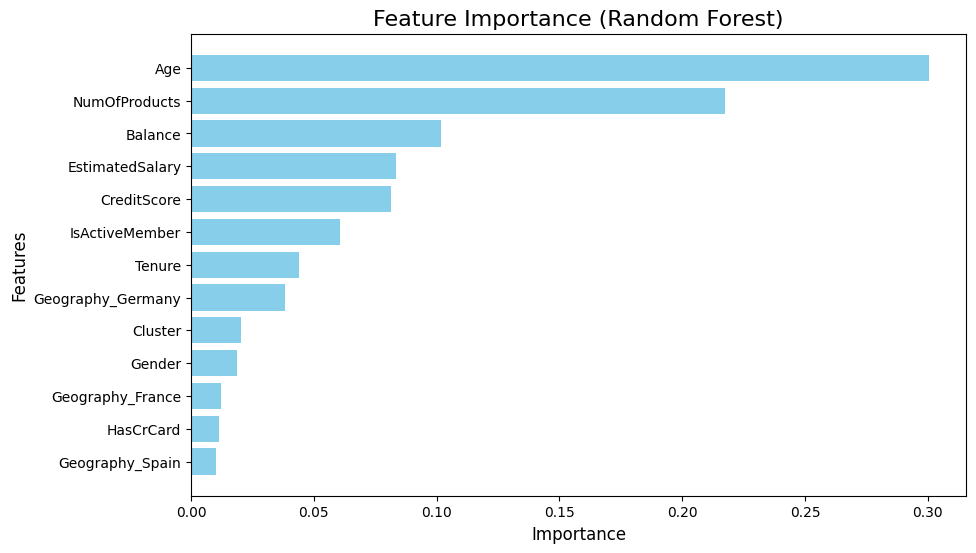

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance on top
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [ ]:
print("Feature Importance - Random Forest")
print(importance_df)

Feature Importance - Random Forest
              Feature  Importance
2                 Age    0.300542
5       NumOfProducts    0.217552
4             Balance    0.101875
8     EstimatedSalary    0.083527
0         CreditScore    0.081417
7      IsActiveMember    0.060563
3              Tenure    0.043861
10  Geography_Germany    0.038237
12            Cluster    0.020156
1              Gender    0.018840
9    Geography_France    0.012038
6           HasCrCard    0.011228
11    Geography_Spain    0.010165


The feature importance analysis from the tuned Random Forest model shows that the most influential feature is Age (30.5%), followed by NumOfProducts (21.8%) and Balance (10.2%). Other significant features include EstimatedSalary (8.4%), CreditScore (8.1%), and IsActiveMember (6.1%). Less impactful features include Geography_Germany (3.8%), Gender (1.9%), and Geography_France (1.2%).

These results highlight that customer demographics and financial attributes play a critical role in predicting churn. Hyperparameter tuning has successfully improved the model's ability to focus on key features, though further steps may be needed to enhance sensitivity to the minority class (Exited).







### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Prediction using Logistic Regression
log_reg_predictions = log_reg_model.predict(X_test)

# Logistic Regression classification report
print("Logistic Regression Classification Report\n")
log_reg_report = classification_report(y_test, log_reg_predictions, target_names=['Stayed (0)', 'Exited (1)'])
print(log_reg_report)

Logistic Regression Classification Report

              precision    recall  f1-score   support

  Stayed (0)       0.83      0.96      0.89      1991
  Exited (1)       0.60      0.21      0.31       509

    accuracy                           0.81      2500
   macro avg       0.71      0.59      0.60      2500
weighted avg       0.78      0.81      0.77      2500




The Logistic Regression model achieved an overall accuracy of 81%, performing well in predicting the majority class (Stayed - 0) with a precision of 83% and a recall of 96%. However, the model struggled significantly with the minority class (Exited - 1), achieving only 21% recall and an F1-score of 31%, indicating a high number of false negatives. This imbalance suggests that the model is biased towards the majority class, making it less effective at identifying churned customers. Further improvements, such as addressing class imbalance or exploring advanced models, may be needed to enhance performance for the minority class.

### **Conclusion**

Random Forest, after hyperparameter tuning, provides the best performance for predicting churn. This model is recommended for further implementation, with additional steps to increase sensitivity to minority classes (Exited - 1). Logistic Regression can be used as a baseline model, while K-Means can complement the analysis by providing customer segmentation for deeper retention strategies.

In [ ]:
!jupyter nbconvert --to html /content/ML_CHURN.ipynb

[NbConvertApp] Converting notebook /content/ML_CHURN.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 877327 bytes to /content/ML_CHURN.html
